In [14]:
from perfetto.trace_processor import TraceProcessor, TraceProcessorConfig
import matplotlib.pyplot as plt




In [16]:
# 创建 TraceProcessorConfig 对象并设置 verbose=True
config = TraceProcessorConfig(verbose=True,bin_path='./trace_processor')

# 初始化 TraceProcessor 对象时传入配置对象
tp = TraceProcessor(trace='./refers/trace',config=config)
qr_it = tp.query('select ts, counter_track.name, value  from counter join counter_track where counter_track.id=counter.track_id')
qr_df = qr_it.as_pandas_dataframe()
print(qr_df.head())

[261.118]             httpd.cc:99 [HTTP] Starting RPC server on localhost:58522
[261.118]            httpd.cc:104 [HTTP] This server can be used by reloading https://ui.perfetto.dev and clicking on YES on the "Trace Processor native acceleration" dialog or through the Python API (see https://perfetto.dev/docs/analysis/trace-processor#python-api).
[262.051]       http_server.cc:83 [HTTP] New connection
[262.051]      http_server.cc:231 [HTTP] GET /status [body=0B, origin=""]
[262.051]       http_server.cc:90 [HTTP] Client disconnected
[262.054]       http_server.cc:83 [HTTP] New connection
[262.055]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[262.061]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[262.065]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[262.068]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[262.071]      http_server.cc:231 [HTTP] POST /parse [body=547470B, origin=""]
[262.

                 ts             name         value
0  1308963560000000  power.rails.tpu  2332897248.0
1  1308963721000000  power.rails.tpu  2332899371.0
2  1308963971000000  power.rails.tpu  2332902667.0
3  1308964221000000  power.rails.tpu  2332905950.0
4  1308964470000000  power.rails.tpu  2332909233.0


In [17]:
power_df = qr_df[qr_df['name'].str[:5] == 'power']
print(power_df['name'].value_counts())

name
power.rails.tpu                 241
power.rails.modem               241
power.rails.radio.frontend      241
power.rails.cpu.big             241
power.rails.cpu.mid             241
power.rails.cpu.little          241
power.rails.system.fabric       241
power.rails.memory.interface    241
power.rails.wifi.bt             241
power.rails.aoc.memory          241
power.rails.aoc.logic           241
power.rails.ddr.a               241
power.rails.ddr.b               241
power.rails.ddr.c               241
power.rails.gpu                 241
power.rails.display             241
Name: count, dtype: int64


['power.rails.aoc.logic', 'power.rails.aoc.memory', 'power.rails.cpu.big', 'power.rails.cpu.little', 'power.rails.cpu.mid', 'power.rails.ddr.a', 'power.rails.ddr.b', 'power.rails.ddr.c', 'power.rails.display', 'power.rails.gpu', 'power.rails.memory.interface', 'power.rails.modem', 'power.rails.radio.frontend', 'power.rails.system.fabric', 'power.rails.tpu', 'power.rails.wifi.bt']


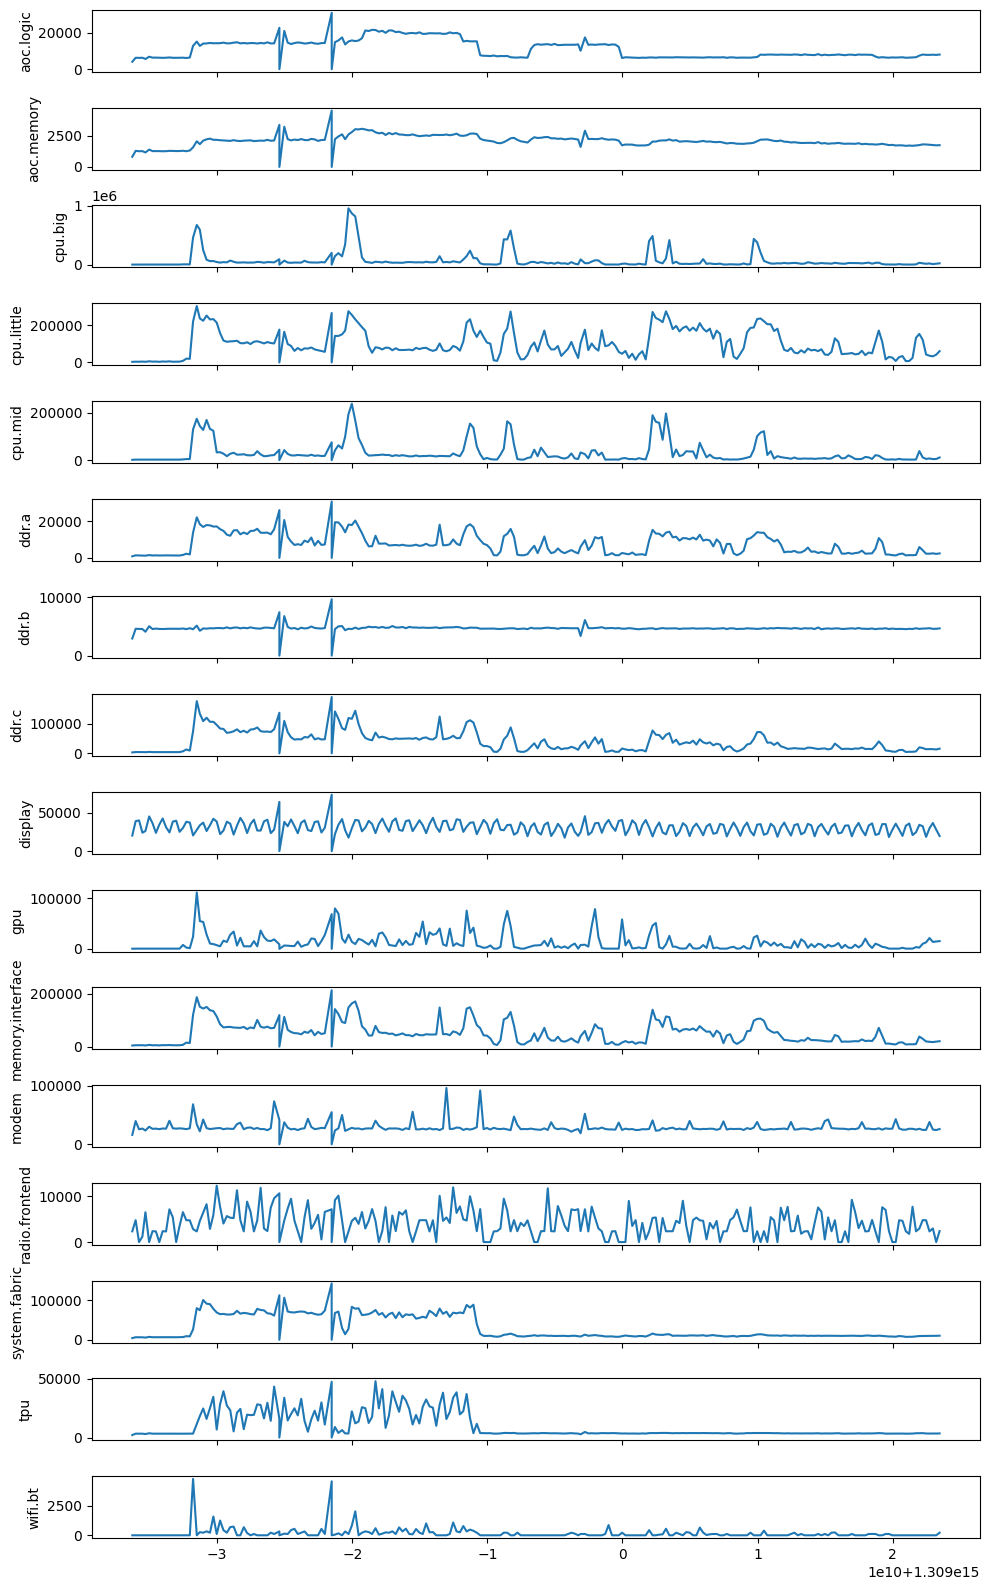

In [30]:

# 获取所有唯一的 'name'
unique_names = sorted(power_df['name'].unique())
print(unique_names)

# 确定子图的行数和列数
num_rows = len(unique_names)
num_cols = 1

# 创建一个新的图形，包含所需行列的子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 1*num_rows), sharex=True)

# 遍历每个 'name'，在相应的子图中绘制对应的数据
for i, name in enumerate(unique_names):
    # 选择当前 'name' 对应的数据
    data = power_df[power_df['name'] == name]
    diffs = data['value'].diff()
    time_diffs = data['ts'].diff()
    # data['ratio'] =  diffs / time_diffs
   
    # 绘制线图
    axes[i].plot(data['ts'].iloc[1:], diffs.iloc[1:], label=name)
   
    # 添加标题和标签
    axes[i].set_ylabel(name[12:])



# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()
